In [1]:
import numpy as np
import pandas as pd

In [2]:
from scipy.stats import ttest_rel

methods = ['rf', 'lda', 'qda', 'logreg', 'transformer', 'foundation']
dfs = {method: pd.read_csv(f'louo_{method}_results.csv') for method in methods}
metrics = ['Accuracy', 'Precision', 'AUROC', 'Specificity', 'Kappa']

for metric in metrics:
    print(f"\n=== Paired t-tests against foundation for {metric} ===")
    comparisons = [m for m in methods if m != 'foundation']
    n_tests = len(comparisons)
    for m in comparisons:
        col = metric
        if col not in dfs[m].columns:
            col = 'AUROC'
        vals1 = dfs[m][col]
        vals2 = dfs['foundation'][col]
        tstat, pval = ttest_rel(vals1, vals2, alternative='less')
        pval_bonf = min(pval * n_tests, 1.0)  # Bonferroni correction
        print(f"t-test {m} vs foundation: t = {tstat:.4f}, "
              f"raw p = {pval:.4f}, Bonferroni corrected p = {pval_bonf:.4f}")


=== Paired t-tests against foundation for Accuracy ===
t-test rf vs foundation: t = -7.2739, raw p = 0.0000, Bonferroni corrected p = 0.0000
t-test lda vs foundation: t = -6.4519, raw p = 0.0000, Bonferroni corrected p = 0.0001
t-test qda vs foundation: t = -6.4752, raw p = 0.0000, Bonferroni corrected p = 0.0001
t-test logreg vs foundation: t = -7.8532, raw p = 0.0000, Bonferroni corrected p = 0.0000
t-test transformer vs foundation: t = -4.9455, raw p = 0.0002, Bonferroni corrected p = 0.0011

=== Paired t-tests against foundation for Precision ===
t-test rf vs foundation: t = -3.8388, raw p = 0.0014, Bonferroni corrected p = 0.0069
t-test lda vs foundation: t = -7.2724, raw p = 0.0000, Bonferroni corrected p = 0.0000
t-test qda vs foundation: t = -6.8670, raw p = 0.0000, Bonferroni corrected p = 0.0001
t-test logreg vs foundation: t = -6.6061, raw p = 0.0000, Bonferroni corrected p = 0.0001
t-test transformer vs foundation: t = -4.6133, raw p = 0.0004, Bonferroni corrected p = 0.00

In [3]:
import pandas as pd

# Map abbreviations to full names
method_names = {
    'rf': 'Random Forest',
    'lda': 'Linear Discriminant Analysis',
    'qda': 'Quadratic Discriminant Analysis',
    'logreg': 'Logistic Regression',
    'transformer': 'Transformer',
    'foundation': 'Foundation Model'
}

abbr_methods = list(method_names.keys())
metrics = ['Accuracy', 'Precision', 'AUC', 'Specificity', 'Kappa']

# Read in all results
dfs = {abbr: pd.read_csv(f'louo_{abbr}_results.csv') for abbr in abbr_methods}

# Compute mean for each method and metric
means_dict = {}
for abbr in abbr_methods:
    means_dict[method_names[abbr]] = []
    for metric in metrics:
        col = metric
        if col not in dfs[abbr].columns:
            col = 'AUROC'
        means_dict[method_names[abbr]].append(dfs[abbr][col].mean())

# Make DataFrame for the table
means_df = pd.DataFrame(means_dict, index=metrics).T

# Generate LaTeX table
latex_table = means_df.to_latex(
    float_format="%.3f", 
    caption="Mean metrics for all methods", 
    label="tab:means", 
    bold_rows=True
)
print(latex_table)

\begin{table}
\caption{Mean metrics for all methods}
\label{tab:means}
\begin{tabular}{lrrrrr}
\toprule
 & Accuracy & Precision & AUC & Specificity & Kappa \\
\midrule
\textbf{Random Forest} & 0.653 & 0.705 & 0.701 & 0.649 & 0.298 \\
\textbf{Linear Discriminant Analysis} & 0.622 & 0.650 & 0.670 & 0.598 & 0.236 \\
\textbf{Quadratic Discriminant Analysis} & 0.614 & 0.624 & 0.648 & 0.431 & 0.205 \\
\textbf{Logistic Regression} & 0.628 & 0.658 & 0.696 & 0.624 & 0.252 \\
\textbf{Transformer} & 0.646 & 0.602 & 0.701 & 0.598 & 0.283 \\
\textbf{Foundation Model} & 0.806 & 0.825 & 0.846 & 0.762 & 0.605 \\
\bottomrule
\end{tabular}
\end{table}



In [4]:
from scipy.stats import ttest_rel
import pandas as pd

methods = ['rf', 'lda', 'qda', 'logreg', 'transformer', 'foundation']
dfs = {method: pd.read_csv(f'loo_{method}_results.csv') for method in methods}
metrics = ['Accuracy', 'Precision', 'AUROC', 'Specificity', 'Kappa']

for metric in metrics:
    print(f"\n=== Paired t-tests against foundation for {metric} ===")
    comparisons = [m for m in methods if m != 'foundation']
    n_tests = len(comparisons)
    for m in comparisons:
        col = metric
        if col not in dfs[m].columns:
            col = 'AUROC'
        vals1 = dfs[m][col]
        vals2 = dfs['foundation'][col]
        tstat, pval = ttest_rel(vals1, vals2, alternative='less')
        pval_bonf = min(pval * n_tests, 1.0)  # Bonferroni correction
        print(f"t-test {m} vs foundation: t = {tstat:.4f}, "
              f"raw p = {pval:.4f}, Bonferroni corrected p = {pval_bonf:.4f}")


=== Paired t-tests against foundation for Accuracy ===
t-test rf vs foundation: t = -3.2827, raw p = 0.0036, Bonferroni corrected p = 0.0182
t-test lda vs foundation: t = -2.1447, raw p = 0.0276, Bonferroni corrected p = 0.1379
t-test qda vs foundation: t = -3.0814, raw p = 0.0052, Bonferroni corrected p = 0.0261
t-test logreg vs foundation: t = -1.8468, raw p = 0.0459, Bonferroni corrected p = 0.2296
t-test transformer vs foundation: t = -2.7100, raw p = 0.0101, Bonferroni corrected p = 0.0507

=== Paired t-tests against foundation for Precision ===
t-test rf vs foundation: t = -3.1715, raw p = 0.0044, Bonferroni corrected p = 0.0222
t-test lda vs foundation: t = -2.7274, raw p = 0.0098, Bonferroni corrected p = 0.0492
t-test qda vs foundation: t = -4.0333, raw p = 0.0010, Bonferroni corrected p = 0.0049
t-test logreg vs foundation: t = -2.2415, raw p = 0.0233, Bonferroni corrected p = 0.1164
t-test transformer vs foundation: t = -1.8757, raw p = 0.0437, Bonferroni corrected p = 0.21

In [5]:
import pandas as pd

# Map abbreviations to full names
method_names = {
    'rf': 'Random Forest',
    'lda': 'Linear Discriminant Analysis',
    'qda': 'Quadratic Discriminant Analysis',
    'logreg': 'Logistic Regression',
    'transformer': 'Transformer',
    'foundation': 'Foundation Model'
}

abbr_methods = list(method_names.keys())
metrics = ['Accuracy', 'Precision', 'AUC', 'Specificity', 'Kappa']

# Read in all results
dfs = {abbr: pd.read_csv(f'loo_{abbr}_results.csv') for abbr in abbr_methods}

# Compute mean for each method and metric
means_dict = {}
for abbr in abbr_methods:
    means_dict[method_names[abbr]] = []
    for metric in metrics:
        col = metric
        if col not in dfs[abbr].columns:
            col = 'AUROC'
        means_dict[method_names[abbr]].append(dfs[abbr][col].mean())

# Make DataFrame for the table
means_df = pd.DataFrame(means_dict, index=metrics).T

# Generate LaTeX table
latex_table = means_df.to_latex(
    float_format="%.3f", 
    caption="Mean metrics for all methods", 
    label="tab:means", 
    bold_rows=True
)
print(latex_table)

\begin{table}
\caption{Mean metrics for all methods}
\label{tab:means}
\begin{tabular}{lrrrrr}
\toprule
 & Accuracy & Precision & AUC & Specificity & Kappa \\
\midrule
\textbf{Random Forest} & 0.601 & 0.611 & 0.623 & 0.589 & 0.200 \\
\textbf{Linear Discriminant Analysis} & 0.623 & 0.612 & 0.654 & 0.524 & 0.240 \\
\textbf{Quadratic Discriminant Analysis} & 0.588 & 0.587 & 0.584 & 0.476 & 0.173 \\
\textbf{Logistic Regression} & 0.628 & 0.624 & 0.645 & 0.555 & 0.250 \\
\textbf{Transformer} & 0.633 & 0.604 & 0.648 & 0.617 & 0.262 \\
\textbf{Foundation Model} & 0.692 & 0.706 & 0.729 & 0.658 & 0.380 \\
\bottomrule
\end{tabular}
\end{table}



In [6]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
d = [[0.625, 1.0, 0.375, 0.7272727489471436, 0.6000000238418579, 0.9545454382896423, 0.8181818127632141, 0.800000011920929, 0.5416666865348816, 0.75, 0.5, 0.4285714328289032, 0.5909090638160706, 0.5714285969734192, 0.9166666865348816],
[0.44999998807907104, 0.574999988079071, 0.5, 0.9545454382896423, 0.8999999761581421, 0.8636363744735718, 0.8181818127632141, 0.6000000238418579, 1.0, 0.5, 0.6666666865348816, 0.4285714328289032, 0.8636363744735718, 0.1666666716337204, 1.0],
[0.824999988079071, 0.949999988079071, 0.75, 0.6818181872367859, 0.4000000059604645, 0.8636363744735718, 0.5, 0.7250000238418579, 1.0, 0.2954545319080353, 0.625, 0.4523809552192688, 0.5909090638160706, 1.0, 0.8333333134651184],
[0.824999988079071, 0.949999988079071, 0.5, 0.6363636255264282, 0.7250000238418579, 0.7272727489471436, 0.40909090638160706, 0.699999988079071, 0.75, 0.4318181872367859, 0.6666666865348816, 0.3571428656578064, 0.5454545617103577, 0.8333333134651184, 1.0],
[0.824999988079071, 1.0, 0.625, 0.9090909361839294, 0.625, 0.5, 0.40909090638160706, 0.625, 0.5, 0.5, 0.7916666865348816, 0.6904761791229248, 0.7727272510528564, 0.6428571343421936, 0.875],
[0.824999988079071, 0.9750000238418579, 0.9090909361839294, 0.4545454680919647, 0.5, 0.7727272510528564, 0.5909090638160706, 0.7250000238418579, 0.9166666865348816, 0.5, 0.5416666865348816, 0.3571428656578064, 0.8636363744735718, 0.4047619104385376, 0.875],
[0.7749999761581421, 0.949999988079071, 0.4583333432674408, 1.0, 0.9750000238418579, 0.7727272510528564, 0.5909090638160706, 0.7250000238418579, 0.9166666865348816, 0.5454545617103577, 0.6666666865348816, 0.8095238208770752, 0.5909090638160706, 0.5476190447807312, 1.0],
[0.949999988079071, 0.949999988079071, 0.4583333432674408, 0.9545454382896423, 0.75, 0.9545454382896423, 0.5, 0.8500000238418579, 1.0, 0.5454545617103577, 0.8333333134651184, 0.8571428656578064, 0.5454545617103577, 0.5476190447807312, 0.8333333134651184],
[0.6000000238418579, 0.7250000238418579, 0.75, 1.0, 0.8750000238418579, 0.9545454382896423, 0.9, 0.849999988079071, 0.6, 0.9090909361839294, 0.6000000059604645, 0.6, 0.7727272510528564, 0.6428571343421936, 0.9],
[0.6000000238418579, 0.7250000238418579, 0.75, 0.9545454382896423, 0.9750000238418579, 0.9545454382896423, 0.8181818127632141, 0.7916666865348816, 0.5, 0.8863636255264282, 0.6666666865348816, 0.9523809552192688, 0.7727272510528564, 0.6190476417541504, 1.0],
[0.8996753246753247, 0.7250000238418579, 0.95454544, 0.9090909361839294, 1.0, 0.9545454382896423, 0.6363636255264282, 0.8500000238418579, 0.7916666865348816, 0.6454545617103577, 0.7916666865348816, 0.738095223903656, 0.6363636255264282, 0.6190476417541504, 1.0],
[0.8996753246753247 ,0.668683257918552 ,0.7280526868131462 ,0.8528174603174603 ,0.8533333333333333 ,0.8478354978354978 ,0.767563025210084 ,0.8722222222222221 ,0.9833333333333334 ,0.70075 ,0.7055555555555555 ,0.7888888888888889]]

In [8]:
df = []
for looid,loo in enumerate(d):
    for dsid,ds in enumerate(loo):
        df.append([looid+1,dsid+1,ds])

for _d in d:
    print(np.mean(_d))

0.6799495001633962
0.6857936511437098
0.699502162138621
0.6704761922359467
0.6860606054464976
0.6807431519031525
0.754920635620753
0.7686507920424144
0.778614721695582
0.797741707166036
0.8101010158882265
0.8057258821752833


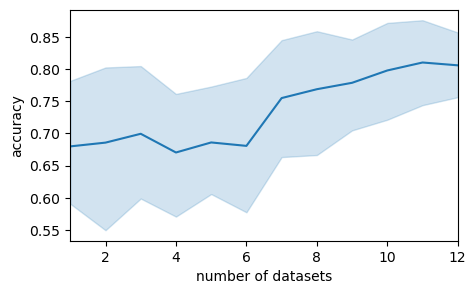

In [9]:
# draw lineplot
data=pd.DataFrame(df,columns=['number_ds','ds','acc'])
plt.rcParams['figure.figsize']=(5,3)
plt.margins(x=0)
ax = sns.lineplot(x="number_ds", y="acc", data=data)
ax.set(xlabel='number of datasets', ylabel='accuracy')
plt.savefig('numberdataset.png', dpi=1000, bbox_inches="tight")
plt.show()

In [10]:
percents = [0,10,20,30,40,50,60,70,80,90,100]
dfs = {percent: pd.read_csv(f'percent_{percent}_louo_foundation_results.csv') for percent in percents}

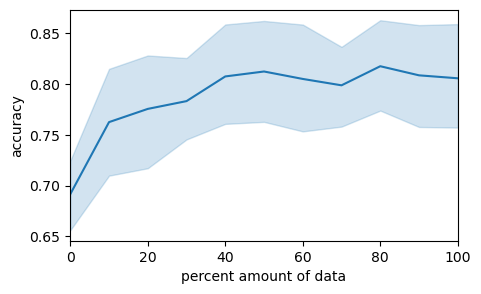

In [11]:
metrics = ['Accuracy', 'Precision', 'AUC', 'Specificity', 'Kappa']

df = []
for metric in metrics:
    for percent in percents:
        #print(metric,percent,dfs[percent][metric].mean())
        if metric == 'Accuracy':
            for idx,val in enumerate(dfs[percent][metric]):
                df.append([percent,idx,val])
                #if percent==100:
                #    print(val,',')

# draw lineplot
data=pd.DataFrame(df,columns=['percent','ds','acc'])
plt.rcParams['figure.figsize']=(5,3)
plt.margins(x=0)
ax = sns.lineplot(x="percent", y="acc", data=data)
ax.set(xlabel='percent amount of data', ylabel='accuracy')
plt.savefig('percentdata.png', dpi=1000, bbox_inches="tight")
plt.show()

In [35]:
excludes = [0,1,3,4,5,6]
excludes_labels = ['HR','EDA','IBI','ACC','BVP','TEMP','ALL']
dfs = {exclude: pd.read_csv(f'excludeFeature_{exclude}_louo_foundation_results.csv') for exclude in excludes}
dfs[7] = pd.read_csv(f'percent_100_louo_foundation_results.csv')
excludes.append(7)
metrics = ['Accuracy', 'Precision', 'AUC', 'Specificity', 'Kappa']

df = []
for metric in metrics:
    print(metric)
    for exidx,exclude in enumerate(excludes):
        for idx,val in enumerate(dfs[exclude][metric]):
            df.append([exclude,idx,val])
        print('exclude '+excludes_labels[exidx],np.mean(dfs[exclude][metric]))

Accuracy
exclude HR 0.7641871971993681
exclude EDA 0.7699380748939798
exclude IBI 0.7992031279546149
exclude ACC 0.7871014631475625
exclude BVP 0.797345427754089
exclude TEMP 0.7822560509212252
exclude ALL 0.8057258821752833
Precision
exclude HR 0.7961777124332419
exclude EDA 0.7917216948834005
exclude IBI 0.824540784492382
exclude ACC 0.8122589994579893
exclude BVP 0.8233658642145069
exclude TEMP 0.8137763657125078
exclude ALL 0.8248693574266491
AUC
exclude HR 0.8186749268845768
exclude EDA 0.7936813045490583
exclude IBI 0.830511154191127
exclude ACC 0.831340516115686
exclude BVP 0.8442612808625564
exclude TEMP 0.8221252351277154
exclude ALL 0.8455206777916029
Specificity
exclude HR 0.7038388373133796
exclude EDA 0.7234955119181734
exclude IBI 0.7475171820183261
exclude ACC 0.7402852798947094
exclude BVP 0.768626600564383
exclude TEMP 0.7379160698363335
exclude ALL 0.7623624857203118
Kappa
exclude HR 0.5245923205000232
exclude EDA 0.5351484912862019
exclude IBI 0.592519560599353
exclu

In [36]:
import numpy as np
import pandas as pd

excludes = [0,1,3,4,5,6]
excludes_labels = ['HR','EDA','IBI','ACC','BVP','TEMP','ALL']
dfs = {exclude: pd.read_csv(f'excludeFeature_{exclude}_louo_foundation_results.csv') for exclude in excludes}
dfs[7] = pd.read_csv(f'percent_100_louo_foundation_results.csv')
excludes.append(7)
excludes_labels.append('ALL')

metrics = ['Accuracy', 'Precision', 'AUC', 'Specificity', 'Kappa']

# Collect means in a list-of-lists for table
means = []
for exidx, exclude in enumerate(excludes):
    row = []
    for metric in metrics:
        mean_val = np.mean(dfs[exclude][metric])
        row.append(mean_val)
    means.append(row)

# Print LaTeX Table
print("\\begin{tabular}{l" + "c"*len(metrics) + "}")
print("\\toprule")
print("Excluded Feature & " + " & ".join(metrics) + " \\\\")
print("\\midrule")
for label, row in zip(excludes_labels, means):
    vals = ["{:.3f}".format(val) for val in row]
    print(f"{label} & {' & '.join(vals)} \\\\")
print("\\bottomrule")
print("\\end{tabular}")

\begin{tabular}{lccccc}
\toprule
Excluded Feature & Accuracy & Precision & AUC & Specificity & Kappa \\
\midrule
HR & 0.764 & 0.796 & 0.819 & 0.704 & 0.525 \\
EDA & 0.770 & 0.792 & 0.794 & 0.723 & 0.535 \\
IBI & 0.799 & 0.825 & 0.831 & 0.748 & 0.593 \\
ACC & 0.787 & 0.812 & 0.831 & 0.740 & 0.567 \\
BVP & 0.797 & 0.823 & 0.844 & 0.769 & 0.590 \\
TEMP & 0.782 & 0.814 & 0.822 & 0.738 & 0.558 \\
ALL & 0.806 & 0.825 & 0.846 & 0.762 & 0.605 \\
\bottomrule
\end{tabular}
